In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-02-28 22:28:46,468] INFO in core: Started 


2019-12-10


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
IRA,50.0,0.165808,0.802075,-3.095568,0.175694,0.313267,0.555711,1.050822,0.196829,6.515999,14.772225,-2.772376
CSI 300,50.0,0.044114,0.807603,-2.366262,-0.124438,0.237779,0.586249,1.403792,0.044797,2.539868,15.608808,-1.162817
Alibaba,50.0,0.026477,0.778771,-1.987437,-0.557053,0.263729,0.594813,1.260611,0.023808,3.766527,11.042172,-0.615473
M1,50.0,-0.010493,0.394279,-1.425819,-0.040471,0.134686,0.197798,0.467615,-0.046742,-1.972451,7.169052,-2.210974
S&P 500,50.0,-0.041347,0.648186,-2.439085,-0.031599,0.192923,0.271299,0.639140,-0.076033,-5.043671,12.437190,-2.523908


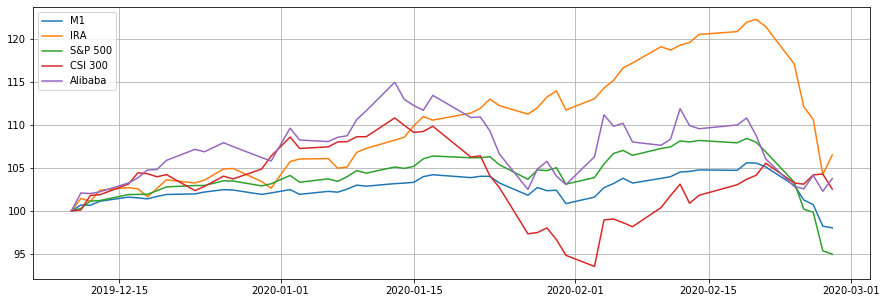

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 55)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 55)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR', 'BABA'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
    'Alibaba': data['BABA'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

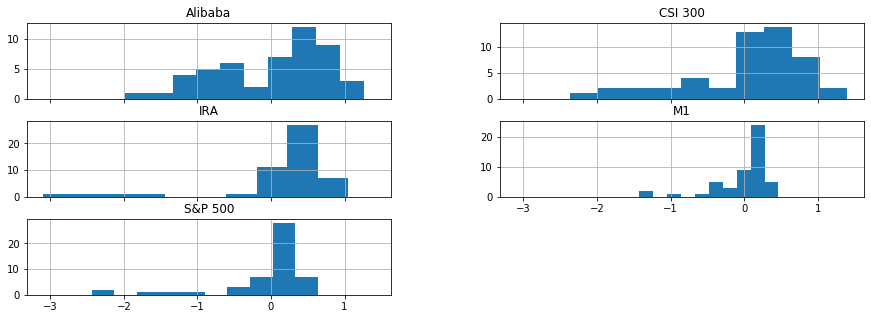

In [3]:
ret = frame.rolling(5).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(3, 2))